<a href="https://colab.research.google.com/github/TGB85/income_inequality_assignment/blob/main/income_inequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Income inequality in relation to GDP
Is there a relation between a country's Gross Domestrict Product (GDP) and its income inequality?
> There is a weak negative correlation between the GDP of a country and the income inequality, as measured by the Gini index:  
r = -0.415738

## Assignment
* One way to express income inequality is to look at a country's "Gini coefficient" (also known as "Gini index"). You can find a dataset of Gini Coefficients [here](https://ourworldindata.org/income-inequality#high-income-countries-tend-to-have-lower-inequality).
> Gini index, 1981-2019: A measure of inequality between 0 and 100, where higher values indicate higher inequality.
* You can find a dataset with historical GDP data [here](https://ourworldindata.org/economic-growth#gdp-per-capita-over-the-long-run).
> GDP per capita, 1820-2018
* To be able to answer this question you would want to calculate the "correlation coefficient" of the GDP and the Gini coefficient. But before you can do that you may need to resample the data so a correlation coefficient can be calculated.
> pandas df.corr()  
> numpy np.corrcoef(array1, array2)  

Rule of thumb for correlation:

|\|r\|| Strenght of relationship|
|-------|---------------|
|0.0 < 0.3| None to very weak|
|0.3 < 0.5 |Weak|
|0.5 < 0.7| Moderate|
|0.7 < 1.0| Strong|  


In [22]:
import pandas as pd
# from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
# parser = lambda x: datetime.strptime(x, '%Y')
gini = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/economic-inequality-gini-index.csv', usecols=['Entity', 'Year', 'Gini index']) # parse_dates=['Year'], date_parser=parser
gini.columns = ['country', 'year', 'gini']
# gini['year'] = gini['year'].dt.year
gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  4384 non-null   object 
 1   year     4384 non-null   int64  
 2   gini     4384 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 102.9+ KB


In [24]:
gdp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gdp-per-capita-maddison-2020.csv', usecols=['Entity', 'Year', 'GDP per capita'])
gdp.columns = ['country', 'year', 'gdp']
gdp.drop(gdp.loc[gdp['year'] < 1981].index, inplace=True)
# gdp['year'] = pd.to_datetime(gdp['year'], format='%Y').dt.year
gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6461 entries, 31 to 19875
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  6461 non-null   object 
 1   year     6461 non-null   int64  
 2   gdp      6461 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 201.9+ KB


In [25]:
df = pd.merge(gini, gdp, how="inner", on=["country", "year"]) 
df.set_index("year", inplace=True)
df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3536 entries, 1981 to 2017
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  3536 non-null   object 
 1   gini     3536 non-null   float64
 2   gdp      3536 non-null   float64
dtypes: float64(2), object(1)
memory usage: 110.5+ KB


# Correlation coefficient

In [26]:
df.corr()

,gini,gdp
gini,1.000000,-0.415738
gdp,-0.415738,1.000000


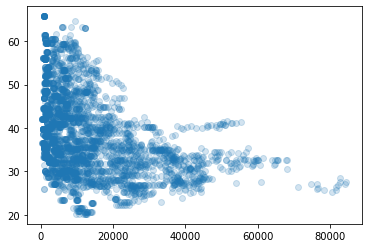

In [27]:
plt.scatter(df.gdp, df.gini, alpha=0.2)
plt.show()

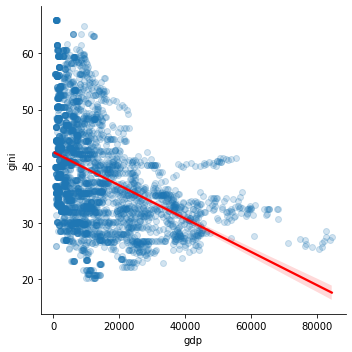

In [28]:
sns.lmplot(data=df, x='gdp', y='gini', scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
plt.show()

# // Visualization attempts //

In [41]:
# countries with biggest change in gdp
low_gdp = df.groupby('country').gdp.min()
high_gdp = df.groupby('country').gdp.max()
low_high_gdp = pd.concat([low_gdp, high_gdp], axis=1, sort=False, keys=['low_gdp', 'high_gdp'])
low_high_gdp['change'] = low_high_gdp.high_gdp - low_high_gdp.low_gdp
# low_high_gdp.sort_values(by="change", ascending=False)
# top three: United Arab Emirates, Norway, Ireland

In [42]:
# norway
norway_gdp = df.loc[df['country'] == 'Norway', 'gdp']
norway_gini = df.loc[df['country'] == 'Norway', 'gini']
# united arab emirates
uae_gdp = df.loc[df['country'] == 'United Arab Emirates', 'gdp']
uae_gini = df.loc[df['country'] == 'United Arab Emirates', 'gini']
# ireland
ireland_gdp = df.loc[df['country'] == 'Ireland', 'gdp']
ireland_gini = df.loc[df['country'] == 'Ireland', 'gini']

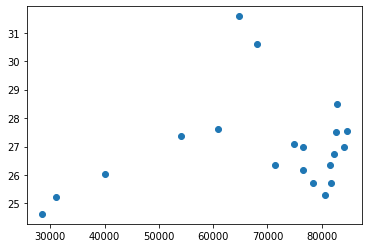

In [43]:
plt.scatter(norway_gdp, norway_gini)
plt.show()

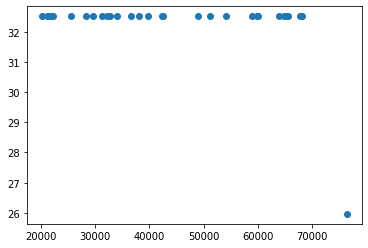

In [44]:
plt.scatter(uae_gdp, uae_gini)
plt.show()

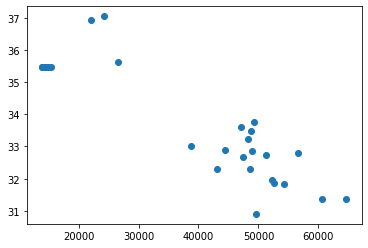

In [45]:
plt.scatter(ireland_gdp, ireland_gini)
plt.show()

In [46]:
# countries with highest and lowest gdp
# df.sort_values(by='gdp', ascending=False, inplace=True)
# df.iloc[0] # Norway
# df.iloc[-1] # Liberia

# liberia
liberia_gdp = df.loc[df['country'] == 'Liberia', 'gdp']
liberia_gini = df.loc[df['country'] == 'Liberia', 'gini']

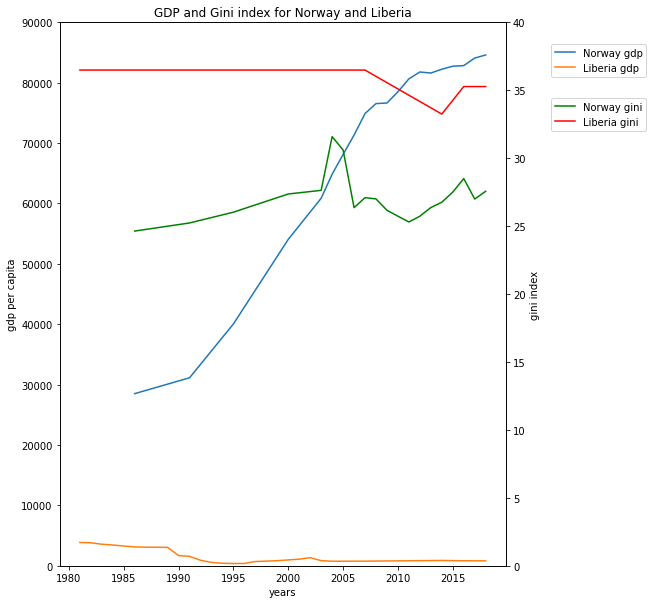

In [47]:
fig, ax = plt.subplots(figsize=(8, 10))
ax.plot(norway_gdp.index, norway_gdp, label='Norway gdp')
ax.plot(liberia_gdp.index, liberia_gdp, label='Liberia gdp')
ax.set_ylim(0, 90000, 5000)
ax.set(xlabel='years', ylabel='gdp per capita', title='GDP and Gini index for Norway and Liberia')
ax2 = ax.twinx()
ax2.plot(norway_gini.index, norway_gini, label='Norway gini', color='green')
ax2.plot(liberia_gini.index, liberia_gini, label='Liberia gini', color='red')
ax2.set_ylim(0, 40)
ax2.set_ylabel('gini index')
ax.legend(loc=(1.1, 0.9))
ax2.legend(loc=(1.1, 0.8))
plt.show()

In [48]:
# countries with biggest change in gini index
low_gini = df.groupby('country').gini.min()
high_gini = df.groupby('country').gini.max()
low_high_gini = pd.concat([low_gini, high_gini], axis=1, sort=False, keys=['low_gini', 'high_gini'])
low_high_gini['change'] = low_high_gini.high_gini - low_high_gini.low_gini
# low_high_gini.sort_values(by="change", ascending=False)
# top three: Sao Tome and Principe, Malawi, Kyrgyzstan

In [49]:
# Sao Tome and Principe
stap_gdp = df.loc[df['country'] == 'Sao Tome and Principe', 'gdp']
stap_gini = df.loc[df['country'] == 'Sao Tome and Principe', 'gini']
# Malawi 
malawi_gdp = df.loc[df['country'] == 'Malawi', 'gdp']
malawi_gini = df.loc[df['country'] == 'Malawi', 'gini']
# Kyrgyzstan
kyr_gdp = df.loc[df['country'] == 'Kyrgyzstan', 'gdp']
kyr_gini = df.loc[df['country'] == 'Kyrgyzstan', 'gini']

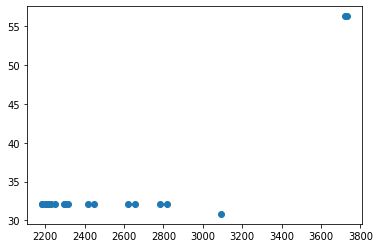

In [50]:
plt.scatter(stap_gdp, stap_gini)
plt.show()

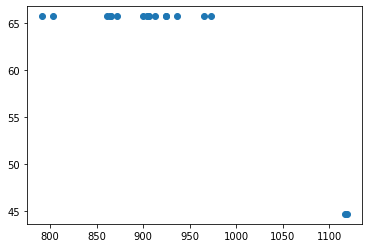

In [51]:
plt.scatter(malawi_gdp, malawi_gini)
plt.show()

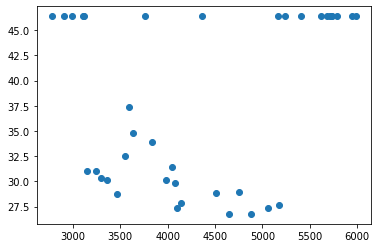

In [52]:
plt.scatter(kyr_gdp, kyr_gini)
plt.show()